Agrupamiento aglomerativo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://bit.ly/2COHM14'
data = pd.read_csv(url)
data.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


In [ ]:
# Preprocesamiento,Normalizacion (para no sesgar los datos)
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns= data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


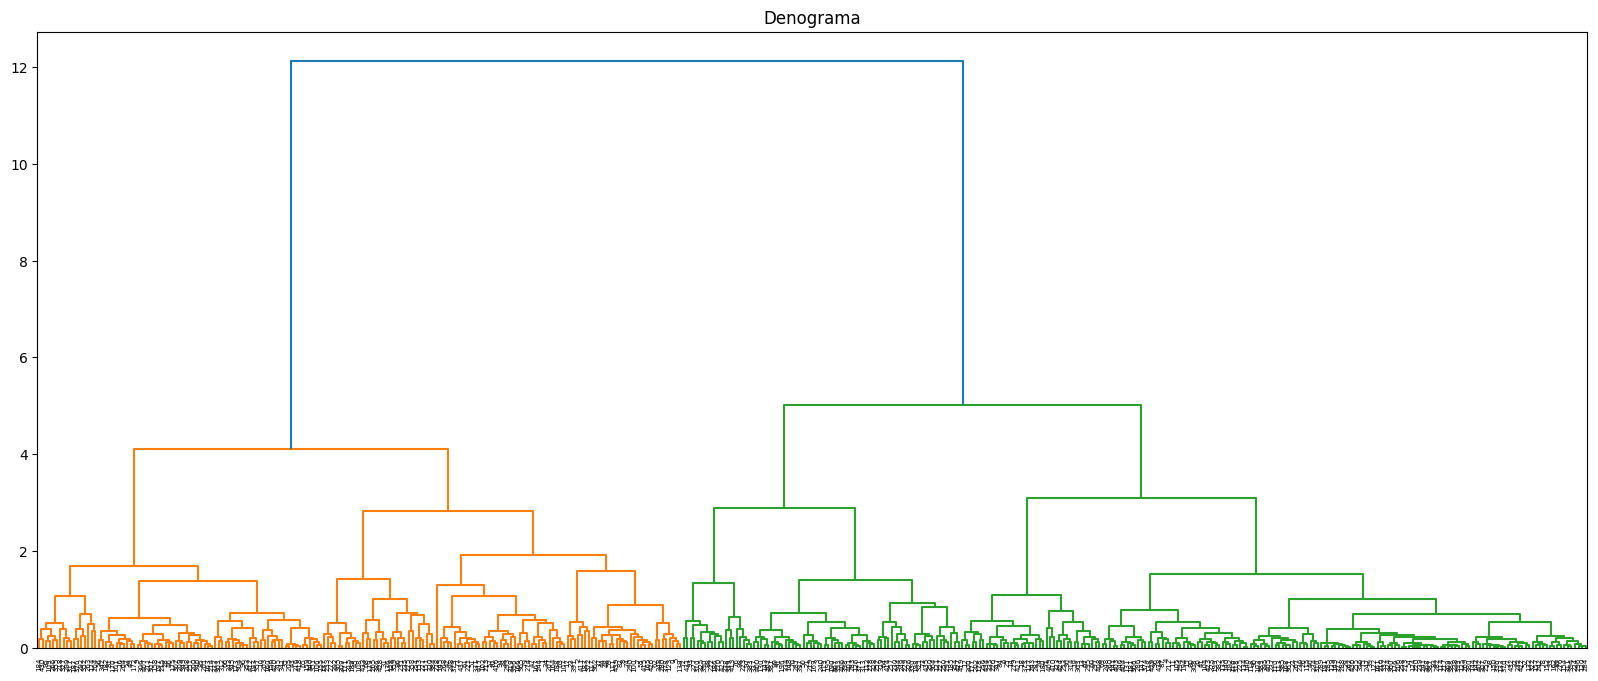

In [ ]:
#Denograma(Cuentos grupos es recomendable)
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,8))
plt.title('Denograma')
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward')) # method o linkage es el tipo de enlazamiento que hace

Se toma la mayor diferencia,entre lineas


---



In [ ]:
# 2 grupos
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward') #linkage tiene que ser el mismo que el del endograma
y_hat = ac.fit_predict(data_scaled)

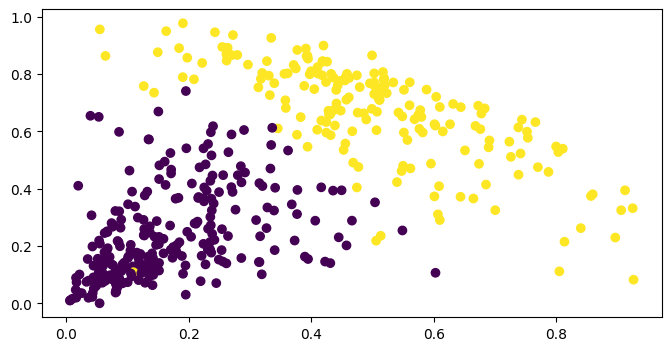

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat)
plt.show()

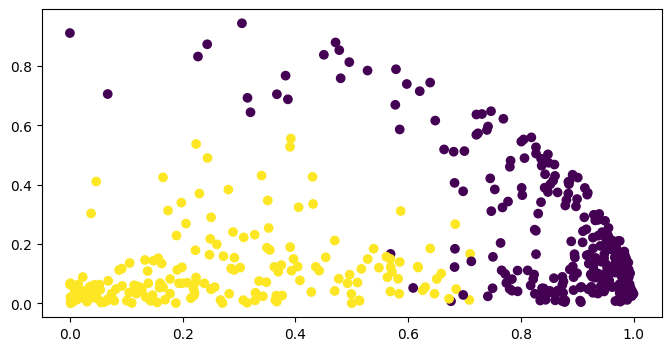

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(data_scaled.Fresh, data_scaled.Frozen, c = y_hat)
plt.show()

Ejemplo 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://bit.ly/3TUeh37'
dataset = pd.read_csv(url)
dataset.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
from typing import ValuesView
# Columnas de intres
X = dataset.iloc[:,[3,4]].values

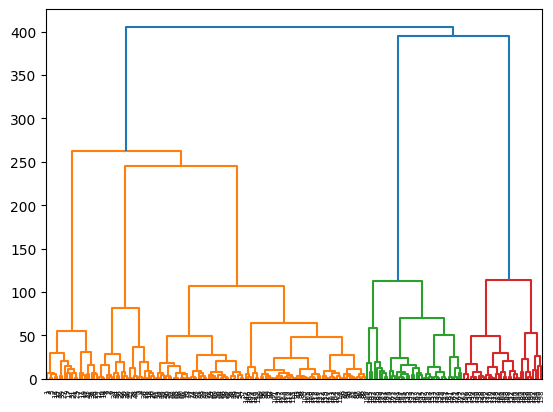

<Figure size 2000x800 with 0 Axes>

In [ ]:
#Dendrograma
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.figure(figsize=(20,8))
plt.show()

Nos recomienda 3 grupos(Fijarse en los colores) pero no necesariamente son los correctos

In [ ]:
# 3 grupos
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hat = ac.fit_predict(X)

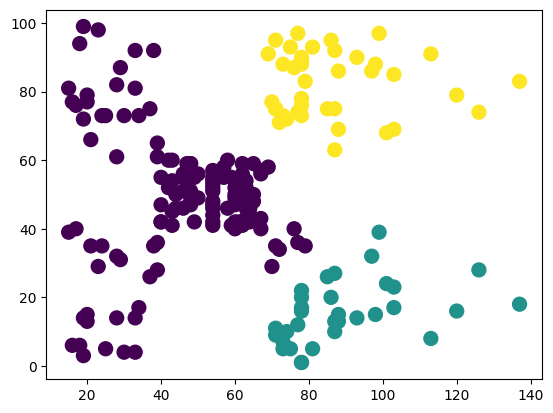

In [ ]:
# Visualizacion
plt.scatter(X[:,0], X[:,1], s=100, c = y_hat)

In [ ]:
# 5 grupos
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = ac.fit_predict(X)

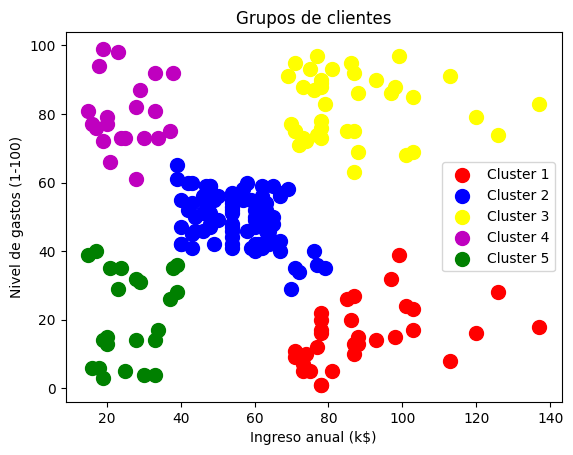

In [ ]:
# Visualizacion
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = '#BF00BF', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.title('Grupos de clientes')
plt.xlabel('Ingreso anual (k$)')
plt.ylabel('Nivel de gastos (1-100)')
plt.legend()
plt.show()

# Modelos de Mezclas Gaussinas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Datos

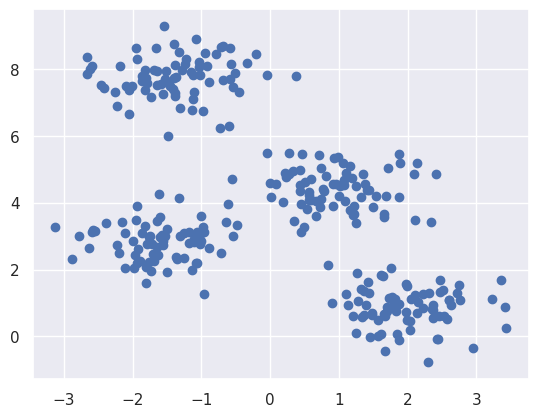

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300, centers = 4, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1])

Criterios de infromacion de Akaike y Bayesiano (para encontrar numero optimo de grupos)

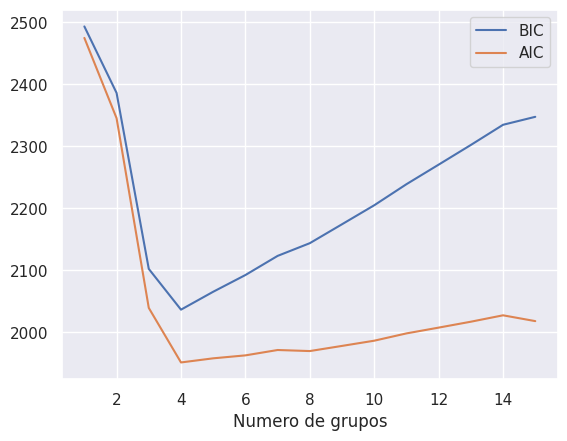

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = range(1,16)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_clusters]
plt.plot(n_clusters, [m.bic(X) for m in models], label='BIC') #Criterio Bayesiano
plt.plot(n_clusters, [m.aic(X) for m in models], label='AIC') #Criterio Akaike
plt.xlabel('Numero de grupos')
plt.legend(loc='best')
plt.show()

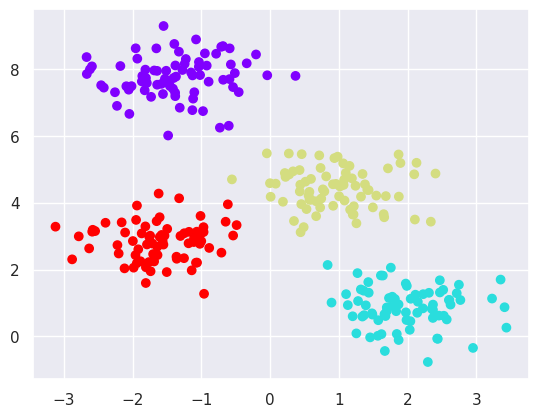

In [ ]:
gmm = GaussianMixture(n_components=4)
gmm.fit(X)
y_hat = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_hat, cmap='rainbow') #c color sea la y estimada

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

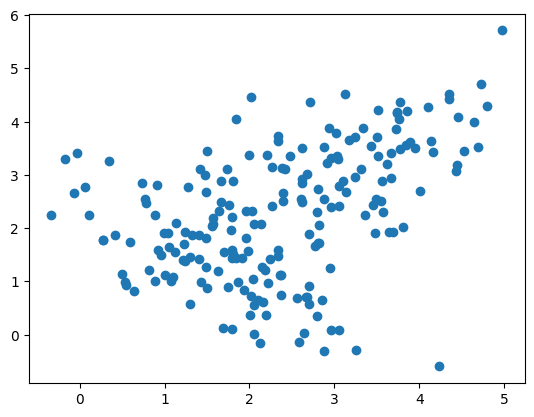

In [2]:
X_train = np.load('data.npy')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [3]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)
print('Medias : \n', gmm.means_)
print('Covariances : \n', gmm.covariances_)

Medias : 
 [[1.60718016 1.35251723]
 [3.04641134 3.10654272]]
Covariances : 
 [[[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]

 [[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]]


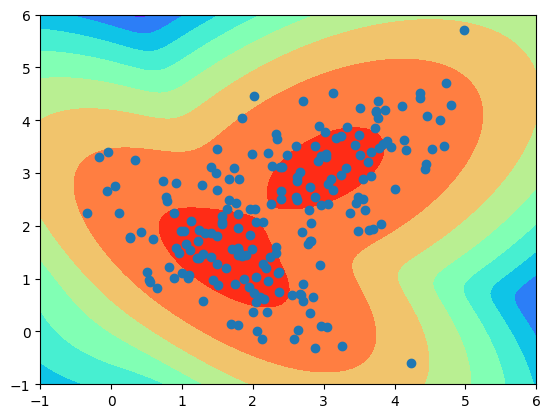

In [4]:
X, Y = np.meshgrid(np.linspace(-1,6,500), np.linspace(-1,6,500))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((500, 500))
plt.contourf(X, Y, Z, cmap='rainbow')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

Las capas son las desviaciones Estandar la del centro es la normal y confrome se aleja va auemnetando las desviaciones estandar

Los puntos lejanos son puntos de anomalia 

# DBSCAN

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
from collections import Counter

In [8]:
df = pd.read_csv('winequality.csv')
print(df.shape)
df.head(2)

(6463, 13)


,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [12]:
data = df.iloc[:,1:3]
data.head(2)

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30


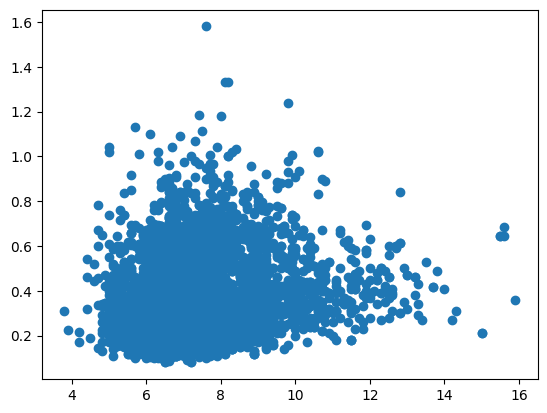

In [15]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [13]:
dbs = DBSCAN(eps=0.2,min_samples=20).fit(data)
dbs

DBSCAN(eps=0.2, min_samples=20)

In [19]:
print(Counter(dbs.labels_))
df_anom = pd.DataFrame(data)
print(df_anom[dbs.labels_==-1])

Counter({np.int64(0): 6281, np.int64(-1): 117, np.int64(1): 40, np.int64(2): 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


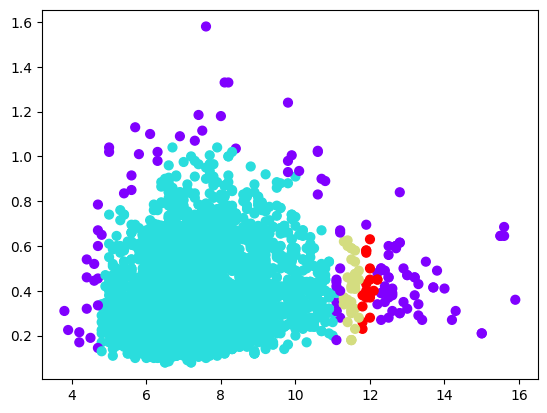

In [28]:
plt.scatter(data.iloc[:,0],data.iloc[:,1], c =  dbs.labels_, s= 40, cmap='rainbow' )
#Los morados son anomailas 

In [27]:
dbs.core_sample_indices_ #Los puntos nucleo

array([   0,    1,    2, ..., 6460, 6461, 6462])